# Import Modules

In [2]:
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

from extract_dataframe import TweetDfExtractor
from extract_dataframe import read_json

_, tweet_list = read_json("../data/global_twitter_data.json")

# Data Preprocessing


## Read Given Data

In [3]:
tweets_df_extractor = TweetDfExtractor(tweet_list)
tweets_df = tweets_df_extractor.get_tweet_df()
tweets_df.head()

,created_at,source,full_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,0.190625,en,15760,2,i_ameztoy,20497,2621,None,[City],[i_ameztoy],
1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,0.100000,en,6967,201,ZIisq,65,272,None,"[China, Taiwan]",[IndoPac_Info],
2,Sun Aug 07 22:31:07 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000e+00,0.000000,en,2166,0,Fin21Free,85,392,None,[XiJinping],[ZelenskyyUa],Netherlands
3,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,0.350000,en,2166,0,Fin21Free,85,392,None,[XiJinping],[],Netherlands
4,Sun Aug 07 22:31:04 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,0.556250,en,17247,381,VizziniDolores,910,2608,None,[],[ChinaUncensored],"Ayent, Schweiz"


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          22000 non-null  object 
 1   source              22000 non-null  object 
 2   full_text           22000 non-null  object 
 3   polarity            22000 non-null  float64
 4   subjectivity        22000 non-null  float64
 5   lang                22000 non-null  object 
 6   favorite_count      22000 non-null  int64  
 7   retweet_count       22000 non-null  int64  
 8   original_author     22000 non-null  object 
 9   followers_count     22000 non-null  int64  
 10  friends_count       22000 non-null  int64  
 11  possibly_sensitive  6191 non-null   object 
 12  hashtags            22000 non-null  object 
 13  user_mentions       22000 non-null  object 
 14  place               22000 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 2.5+

## Removing Duplicate Rows

In [5]:
from clean_tweets_dataframe import Clean_Tweets
clean_tweets = Clean_Tweets(tweets_df)

Automation in Action...!!!


In [6]:
tweets_df.shape


(22000, 15)

In [7]:
clean_tweets.drop_duplicate(tweets_df)
tweets_df.shape

TypeError: unhashable type: 'list'

## Remove Non English Tweets

In [8]:
tweets_df = clean_tweets.remove_non_english_tweets(tweets_df)
tweets_df.shape

(22000, 15)

## Manage Missing values


In [9]:
tweets_df.isna().sum()


created_at                0
source                    0
full_text                 0
polarity                  0
subjectivity              0
lang                      0
favorite_count            0
retweet_count             0
original_author           0
followers_count           0
friends_count             0
possibly_sensitive    15809
hashtags                  0
user_mentions             0
place                     0
dtype: int64

## Manage Missing Data


In [10]:
tweets_df['possibly_sensitive'] = tweets_df['possibly_sensitive'].fillna("not_found")
tweets_df.isna().sum()


created_at            0
source                0
full_text             0
polarity              0
subjectivity          0
lang                  0
favorite_count        0
retweet_count         0
original_author       0
followers_count       0
friends_count         0
possibly_sensitive    0
hashtags              0
user_mentions         0
place                 0
dtype: int64

In [11]:
tweets_df[tweets_df['place'] == ''].shape


(9892, 15)

In [12]:
tweets_df['place'] = tweets_df['place'].fillna("not_known")
tweets_df.isna().sum()

created_at            0
source                0
full_text             0
polarity              0
subjectivity          0
lang                  0
favorite_count        0
retweet_count         0
original_author       0
followers_count       0
friends_count         0
possibly_sensitive    0
hashtags              0
user_mentions         0
place                 0
dtype: int64

## Remove Unwanted Characters


In [13]:
tweets_df = clean_tweets.remove_place_characters(tweets_df)
tweets_df.isna().sum()

created_at            0
source                0
full_text             0
polarity              0
subjectivity          0
lang                  0
favorite_count        0
retweet_count         0
original_author       0
followers_count       0
friends_count         0
possibly_sensitive    0
hashtags              0
user_mentions         0
place                 0
dtype: int64

## Convert to Datetime


In [14]:
tweets_df = clean_tweets.convert_to_datetime(tweets_df)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22000 entries, 0 to 21999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          22000 non-null  datetime64[ns, UTC]
 1   source              22000 non-null  object             
 2   full_text           22000 non-null  object             
 3   polarity            22000 non-null  float64            
 4   subjectivity        22000 non-null  float64            
 5   lang                22000 non-null  object             
 6   favorite_count      22000 non-null  int64              
 7   retweet_count       22000 non-null  int64              
 8   original_author     22000 non-null  object             
 9   followers_count     22000 non-null  int64              
 10  friends_count       22000 non-null  int64              
 11  possibly_sensitive  22000 non-null  object             
 12  hashtags            22000 non-nu

## Extract device from source text


In [15]:
tweets_df['source'][:10]


0    <a href="http://twitter.com/download/android" ...
1    <a href="http://twitter.com/download/android" ...
2    <a href="http://twitter.com/download/android" ...
3    <a href="http://twitter.com/download/android" ...
4    <a href="http://twitter.com/download/iphone" r...
5    <a href="http://twitter.com/download/android" ...
6    <a href="http://twitter.com/download/android" ...
7    <a href="http://twitter.com/download/android" ...
8    <a href="http://twitter.com/download/android" ...
9    <a href="https://mobile.twitter.com" rel="nofo...
Name: source, dtype: object

## Save Preproccessed Data

In [16]:
tweets_df.to_csv("../data/global_twitter_preprocessed_data.csv", index=False)


# Data Exploration


## Getting Preprocessed data

In [17]:
#It is all about getting some insight and understanding the extracted data.
tweets_df = pd.read_csv("../data/global_twitter_preprocessed_data.csv")


In [18]:
tweets_df.head(5)


,created_at,source,full_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,2022-08-07 22:31:20+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,0.190625,en,15760,2,i_ameztoy,20497,2621,not_found,['City'],['i_ameztoy'],NaN
1,2022-08-07 22:31:16+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,0.100000,en,6967,201,ZIisq,65,272,not_found,"['China', 'Taiwan']",['IndoPac_Info'],NaN
2,2022-08-07 22:31:07+00:00,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000e+00,0.000000,en,2166,0,Fin21Free,85,392,not_found,['XiJinping'],['ZelenskyyUa'],Netherlands
3,2022-08-07 22:31:06+00:00,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,0.350000,en,2166,0,Fin21Free,85,392,not_found,['XiJinping'],[],Netherlands
4,2022-08-07 22:31:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,0.556250,en,17247,381,VizziniDolores,910,2608,not_found,[],['ChinaUncensored'],Ayent Schweiz


In [ ]:
# shape of dataframe
tweets_df.shape

In [19]:
# general info about null values, data types, columns
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          22000 non-null  object 
 1   source              22000 non-null  object 
 2   full_text           22000 non-null  object 
 3   polarity            22000 non-null  float64
 4   subjectivity        22000 non-null  float64
 5   lang                22000 non-null  object 
 6   favorite_count      22000 non-null  int64  
 7   retweet_count       22000 non-null  int64  
 8   original_author     22000 non-null  object 
 9   followers_count     22000 non-null  int64  
 10  friends_count       22000 non-null  int64  
 11  possibly_sensitive  22000 non-null  object 
 12  hashtags            22000 non-null  object 
 13  user_mentions       22000 non-null  object 
 14  place               11510 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 2.5+

In [20]:
tweets_df.isna().sum()


created_at                0
source                    0
full_text                 0
polarity                  0
subjectivity              0
lang                      0
favorite_count            0
retweet_count             0
original_author           0
followers_count           0
friends_count             0
possibly_sensitive        0
hashtags                  0
user_mentions             0
place                 10490
dtype: int64

In [22]:
# stats about numerical columns
tweets_df.describe()

,polarity,subjectivity,favorite_count,retweet_count,followers_count,friends_count
count,22000.000000,22000.000000,2.200000e+04,22000.000000,2.200000e+04,22000.000000
mean,0.061325,0.283839,3.791884e+04,177.295636,1.796764e+04,1563.114455
std,0.223701,0.290963,8.952426e+04,498.320518,3.030478e+05,4358.651264
min,-1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,8.657500e+02,3.000000,5.700000e+01,137.000000
50%,0.000000,0.200000,7.133000e+03,39.000000,2.840000e+02,487.000000
75%,0.133333,0.468824,3.425750e+04,187.000000,1.324500e+03,1599.000000
max,1.000000,1.000000,1.717879e+06,17409.000000,1.449852e+07,208360.000000


## Original authors

In [23]:
tweets_df.original_author.value_counts()


TrumpThuan        116
CGMeifangZhang     65
AarianNewsX        59
Lin73324756        48
Bin20211001        46
                 ... 
papago5             1
pmsxa               1
SomethingThar       1
omotenashi_cx       1
ZeitounRimal        1
Name: original_author, Length: 13433, dtype: int64

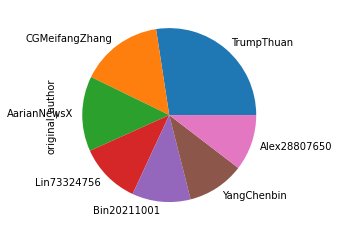

In [25]:
tweets_df.original_author.value_counts().head(7).plot(kind="pie");


## Place

In [27]:
tweets_df.place.value_counts()

                          246
India                     200
United States             166
Hong Kong                 153
Vit Nam                   118
                         ... 
Makassar Indonesia          1
xx                          1
Lephalale South Africa      1
Occopied Pakistan           1
Gelendzhik                  1
Name: place, Length: 3920, dtype: int64

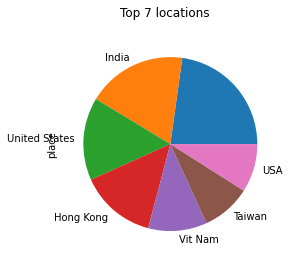

In [29]:
# top 7 locations of users
top_locations = tweets_df.place.value_counts().head(7)
top_locations.plot(kind="pie", subplots=True, title="Top 7 locations");

## Source

In [30]:
tweets_df["source"].value_counts()


<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>                                 8391
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                                              6791
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                   5212
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>                                     634
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>                                   171
                                                                                                                     ... 
<a href="https://twitterrific.com/mac" rel="nofollow">Twitterrific for Mac</a>                                          1
<a href="https://gabrielepicco.github.io/reddit-news" rel="nofollow">Reddit__News</a>                                   1
<a href="https://help.tw

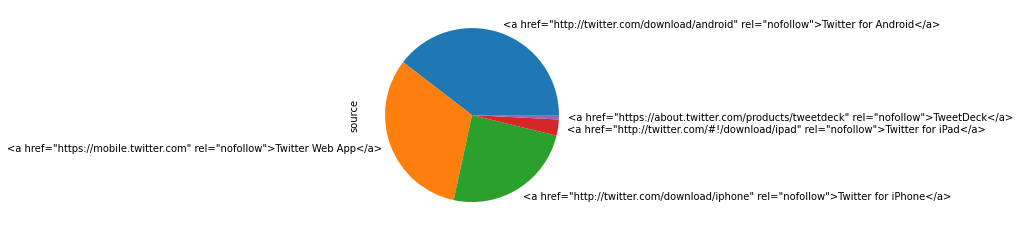

In [31]:
tweets_df["source"].value_counts().head().plot(kind="pie");
